In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chart_studio.plotly as pl
import plotly.offline as of
import cufflinks as cf
import datetime as dt
%matplotlib inline

In [2]:
of.init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
donations = pd.read_csv("Donations.csv")

In [4]:
schools = pd.read_csv("Schools.csv")

In [5]:
donors = pd.read_csv("Donors.csv")

C:\Users\Gokce\AppData\Local\Temp\ipykernel_24896\1116922564.py:1: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
projects = pd.read_csv("Projects.csv")

In [7]:
resources = pd.read_csv("Resources.csv")

In [8]:
teachers = pd.read_csv("Teachers.csv")

In [9]:
x = schools["School State"].value_counts().sort_values(ascending=False).head(10)
x #top 10 states with most number of schools that opened projects to gather donations.

California        8457
Texas             6485
New York          3819
Florida           3302
Illinois          3126
Michigan          2653
Ohio              2546
North Carolina    2543
Pennsylvania      2163
Georgia           2125
Name: School State, dtype: int64

In [10]:
x.iplot(kind='bar' , xTitle='States' , yTitle='Number of schools' , title='top 10 states with most number of schools that opened projects to gather donations')

In [11]:
data = pd.merge(donations , projects , how='inner' , on = 'Project ID')
data2 = pd.merge(data , donors , how='inner' , on='Donor ID')
data3 = pd.merge(data2 , schools , how='inner' , on='School ID')
data4 = pd.merge(data3, teachers , how='inner' , on='Teacher ID')

In [12]:
y = data4.groupby('School State')['Donation Amount'].mean().sort_values(ascending=False).head(10)
y #top 10 states that by average gathered the most donations

School State
Wyoming                 130.232248
Hawaii                   95.364167
Massachusetts            77.926463
Rhode Island             72.429974
District of Columbia     70.693202
North Dakota             69.777091
Washington               69.161616
New Jersey               68.586876
Montana                  67.186760
Alaska                   66.990084
Name: Donation Amount, dtype: float64

In [13]:
y.iplot(kind='bar' , xTitle='State' , yTitle='Average donation per project' , title='top 10 states that by average gathered the most donations' , colorscale='paired' )

In [14]:
mean = np.mean(data4['Donation Amount'].dropna())
median = np.median(data4['Donation Amount'].dropna())
percentiles = np.percentile(data4['Donation Amount'].dropna() ,[25,75])
minimum = data4['Donation Amount'].dropna().min()
maximum = data4['Donation Amount'].dropna().max()

print('mean donation amount is:' ,np.round(mean,2))
print('median donation amount is:' ,median)
print('25% and 75% donation amount is:' ,percentiles)
print('minimum donation amount is:' ,minimum)
print('maximum donation amount is:' ,maximum)

mean donation amount is: 61.03
median donation amount is: 25.0
25% and 75% donation amount is: [15. 50.]
minimum donation amount is: 0.01
maximum donation amount is: 60000.0


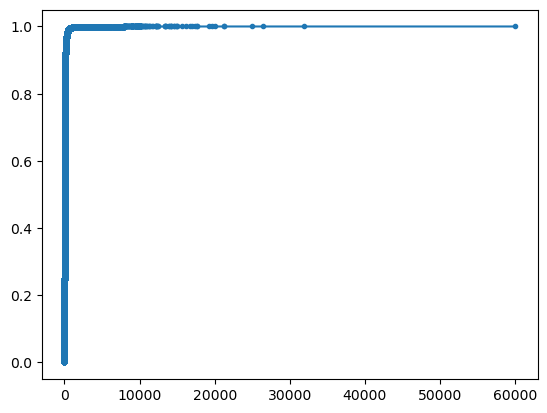

In [15]:
x = np.sort(data4["Donation Amount"].dropna())
y = np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker = '.')

In [16]:
z = data4.groupby('Donor State')['Donation ID'].count().sort_values(ascending = False).head(15)
z #top 10 states with most donations by donors

Donor State
California        693577
New York          350553
Texas             271348
Illinois          230350
Florida           229542
North Carolina    194465
other             184324
Pennsylvania      148752
Georgia           147897
Massachusetts     136845
Michigan          119337
Indiana           117470
Virginia          111740
New Jersey        109926
Ohio              107401
Name: Donation ID, dtype: int64

In [18]:
z.iplot(kind='bar' , xTitle='State',yTitle='top 10 states with most donations by donors',title='Donations count',colorscale='paired')

In [20]:
#Is there a relationship between the number of projects offered and number of donations made by the donors? 
#Which states performing better in this case? How many of them responding project requests below average and 
#which states are performing best in terms of donations per project?
k = schools['School State'].value_counts()
l = data4.groupby('Donor State')['Donation ID'].count()
df = pd.concat([k,l],axis=1,keys=['Projects','Donations'])

In [21]:
df = df.dropna()
df.head()

,Projects,Donations
California,8457.0,693577
Texas,6485.0,271348
New York,3819.0,350553
Florida,3302.0,229542
Illinois,3126.0,230350


In [22]:
df.iplot(kind='scatter',xTitle='Projects',
         yTitle='Donations',title='Projects regarding Donations',
         symbol='x',colorscale='paired',mode='markers')

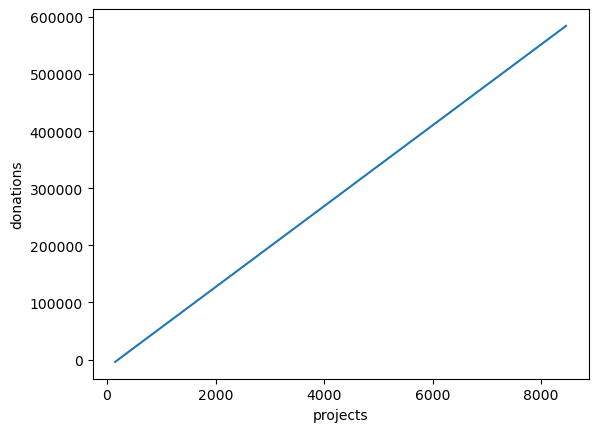

In [26]:
slope,intercept = np.polyfit(df.Projects,df.Donations,1)
x = np.array([df.Projects.min(),df.Projects.max()])
plt.xlabel("projects")
y = slope*x + intercept
plt.ylabel("donations")
plt.plot(x,y)

Text(0.5, 1.0, 'merged plots')

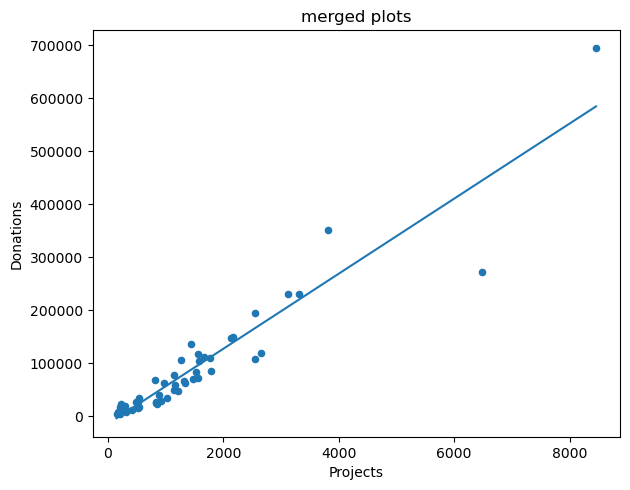

In [28]:
df.plot.scatter(x='Projects' , y='Donations')
slope,intercept = np.polyfit(df.Projects,df.Donations,1)
x = np.array([df.Projects.min(),df.Projects.max()])
y = slope*x + intercept
plt.plot(x,y)
plt.tight_layout()
plt.margins(0.05)
plt.title("merged plots")

In [ ]:
#there is certainly a corrleation